In [52]:
# !pip install -Uqq fastbook
# !pip install ipywidgets
import fastbook
import ipywidgets
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

## Classifcation
  - A classification model is one which attempts to predict a class, or category. That is, predicting from a number of discrete possibilities such as 'dog' or 'cat'

## Regression
 - A regression model is one which attempts to predict one or more numberic quantities, such as temperature, or a location.

## Transfer learning
- Using a ***pretrained*** model for a task different to what it was originally trained for.
- more quickly, less data 


## The state of deep learning
- Vision
    - Detection, Classification
- Text
    - Classification, Conversation
- Tabular
    - High cardinality, GPU(Rapids)
- Recsys
    - Prediction(Recommendation)
- Multi-modal
    - Labeling, Captioning, Human in the loop
- Other
    - NLP -> Protein

# High Temperature and High Humidity Reduces the Transmission of COVID-19 
- How might we dicide if there's a relationship? 
  1. Pick a null hypothesis
    - e.g ***No relationship***
  2. Gather data of independent * dependent variables
    - Temperature & R ( R is a measureof transmissibility)
  3. What % of time would we see that relationship by chance ?

In [6]:
key = 'afbbc77d304846a2b23277922a7ae2a5'

In [4]:
search_images_bing

<function fastbook.search_images_bing>

In [7]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [8]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [10]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
      print(o)
      dest = (path/o)
      dest.mkdir(exist_ok=True)
      results = search_images_bing(key, f'{o} bear')
      download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
fns = get_image_files(path)
fns

(#396) [Path('bears/grizzly/00000007.jpg'),Path('bears/grizzly/00000091.jpg'),Path('bears/grizzly/00000002.jpg'),Path('bears/grizzly/00000049.png'),Path('bears/grizzly/00000009.jpg'),Path('bears/grizzly/00000053.jpg'),Path('bears/grizzly/00000086.jpg'),Path('bears/grizzly/00000126.png'),Path('bears/grizzly/00000068.jpg'),Path('bears/grizzly/00000006.jpg')...]

In [12]:
failed= verify_images(fns)
failed

(#9) [Path('bears/grizzly/00000091.jpg'),Path('bears/grizzly/00000089.jpg'),Path('bears/grizzly/00000115.png'),Path('bears/grizzly/00000021.jpg'),Path('bears/teddy/00000106.jpg'),Path('bears/teddy/00000013.jpg'),Path('bears/black/00000081.jpg'),Path('bears/black/00000132.jpg'),Path('bears/black/00000130.jpg')]

In [13]:
failed.map(Path.unlink)

(#9) [None,None,None,None,None,None,None,None,None]

# From data to DataLoaders

In [15]:
dls = bears.dataloaders(path)

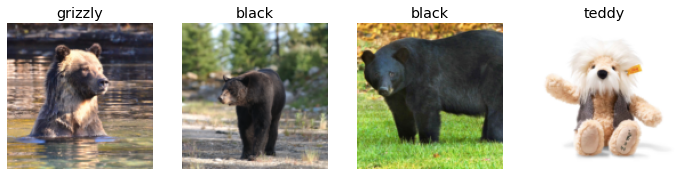

In [16]:
dls.valid.show_batch(max_n= 4, nrows= 1)

# Training your model, and using it to clean your data.

In [29]:
bears = bears.new(
    item_tfms= RandomResizedCrop(224, min_scale= 0.5),
    batch_tfms = aug_transforms()
)

dls = bears.dataloaders(path)

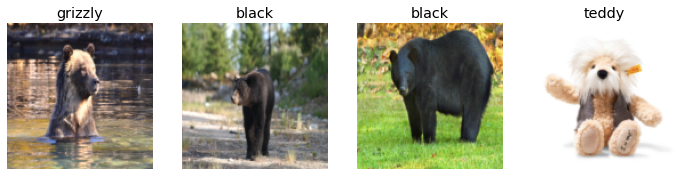

In [30]:
bears = bears.new(item_tfms= Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n= 4, nrows= 1)

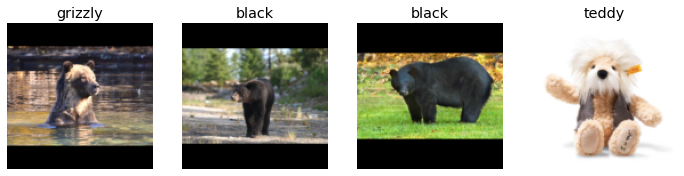

In [33]:
bears = bears.new(item_tfms= Resize(128, ResizeMethod.Pad, pad_mode= 'zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n= 4, nrows= 1)

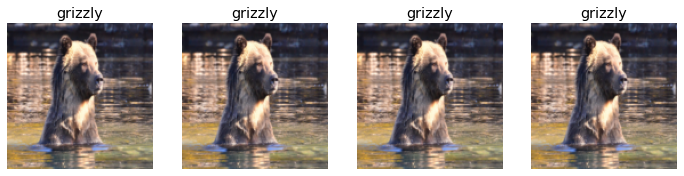

In [36]:
bears = bears.new(item_tfms= RandomResizedCrop(128, min_scale= 0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n= 4, nrows= 1, unique= True)

In [18]:
learn = cnn_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

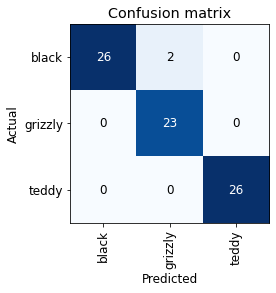

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

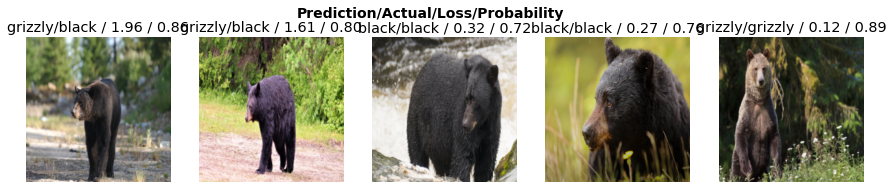

In [25]:
interp.plot_top_losses(5, nrows= 1)

In [40]:
# hide output
cleaner= ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [41]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/ cat)

# Data Augmentation

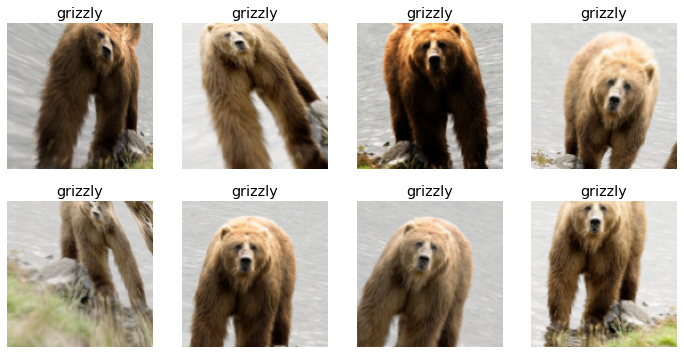

In [37]:
# Data augmentation refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. 
bears = bears.new(item_tfms= Resize(128), batch_tfms= aug_transforms(mult= 2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n= 8, nrows= 2, unique= True)

# Tuning your model into an online application

## Using the model for inference

In [44]:
learn.export()

In [45]:
path = Path()
path.ls(file_exts= '.pkl')

(#1) [Path('export.pkl')]

In [46]:
learn_inf = load_learner(path/'export.pkl')

In [49]:
learn_inf.predict('images/grizzly.jpg')

FileNotFoundError: ignored

In [51]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [65]:
btn_upload = ipywidgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

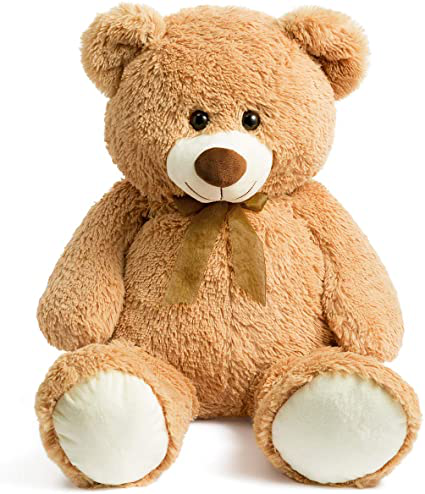

In [66]:
img = PILImage.create(btn_upload.data[-1])
img

In [60]:
out_pl = ipywidgets.Output()
out_pl.clear_output()
out_pl

Output()

In [59]:
with out_pl: display(img.to_thumb(128, 128))

In [61]:
lbl_pred = ipywidgets.Label()
lbl_pred.value = 'Please choose an image'
lbl_pred

Label(value='Please choose an image')

In [63]:
btn_run = ipywidgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [64]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs= learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]: .04f}'

btn_run.on_click(on_click_classify)

In [68]:
VBox([ipywidgets.Label('Select your bear!'), btn_upload, btn_run, out_pl, lbl_pred])